Write a function that takes a string, removes all commas and all words shorter than four characters from it, and returns the remaining string.


In [41]:
import re

def filter_string(sentence):
    sentence = re.sub(r',', '', sentence)     # Remove all commas
    words = sentence.split()     # Split the sentence into words
    filtered_words = [word for word in words if len(word) >= 4]     # Filter out words shorter than four characters
    return ' '.join(filtered_words)    # Join the remaining words back into a sentence

example_sentence = "This, is a test sentence, to remove, short words"
print(filter_string(example_sentence))

import re

This test sentence remove short words


Create an array A with 4 rows and 6 columns containing numbers randomly drawn from a normal distribution with mean of 1 and a standard deviation of 2. Create a second array B containing a slice of A comprising the last two rows and the first four columns. Multiply B an A using matrix multiplication.


In [42]:
import numpy as np

A = np.random.normal(1, 2, (4, 6))
B = A[2:,:4]
result = np.matmul(B, A)
print('A',A)
print('B', B)
print('AxB', result)

A [[ 0.72718442  3.43629654  0.48280328 -1.4657078   5.82645385  2.48150895]
 [-0.18235272  5.00911875  2.52849163  4.61787958  0.23778983  1.14747219]
 [-1.67726868 -0.23981301  0.55936031  2.08529986  2.50919671  0.40905457]
 [ 0.13507395 -1.76280687  4.67610668 -2.28963564  1.37175132  4.74305958]]
B [[-1.67726868 -0.23981301  0.55936031  2.08529986]
 [ 0.13507395 -1.76280687  4.67610668 -2.28963564]]
AxB [[ -1.83248093 -10.77496722   8.64781253  -2.2571847   -5.56549581
    5.68217434]
 [ -7.73268113  -5.45116058 -12.48298031   6.65510713   8.9602854
  -10.63468006]]


Create an array A with 5 rows and 7 columns containing the numbers 1 to 35, where the first column contains the numbers 1 to 5, the second column the numbers 6 to 10 and so on. Create a second array B that results from swapping the first and the last column of the array A. Print the product of 

1. all of the elements in B
2. the elements in the third column of B
3. the elements in the last row of B

In [12]:
import numpy as np

A = np.arange(1, 36).reshape(5, 7, order='F')
B = A.copy()
B[:,[0, -1]] = B[:,[-1, 0]]

print(A)
print(np.prod(B))
print(B[:, 2])
print(B[-1, :])


[[ 1  6 11 16 21 26 31]
 [ 2  7 12 17 22 27 32]
 [ 3  8 13 18 23 28 33]
 [ 4  9 14 19 24 29 34]
 [ 5 10 15 20 25 30 35]]
0
[11 12 13 14 15]
[35 10 15 20 25 30  5]


Read the file 'ATX.csv' that you can find in the folder Course Material / data into a pandas DataFrame, turning the Date column into a DatetimeIndex. Drop all columns of the DataFrame except for  the Adjusted Close. Change the frequency of the data from daily to monthly, using the values at the end of the month. Compute and print the mean and the standard deviation of the monthly returns.

In [23]:
import pandas as pd

# Read the file into a pandas DataFrame
df = pd.read_csv('C:/Users/Nicolas/Documents/Uni/MA Banking and Finance/Pyhton for Fianance I_KU_W23/data/ATX.csv')
# Convert the Date column into a DatetimeIndex
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop all columns except for Adjusted Close
df = df[['Adj Close']]

# Resample the data to monthly frequency
df = df.resample('M').last()

# Compute the monthly returns
monthly_returns = df.pct_change().dropna()

# Compute and print the mean and standard deviation of the monthly returns
mean_returns = monthly_returns.mean()
std_returns = monthly_returns.std()
print('Mean',mean_returns)
print('Sd',std_returns)

Mean Adj Close    0.006712
dtype: float64
Sd Adj Close    0.060684
dtype: float64


Read the file 'ATX.csv' that you can find in the folder Course Material / data into a pandas DataFrame, turning the Date column into a DatetimeIndex. Replace missing values with the last previous available value. Plot the time series of the Adjusted Close.

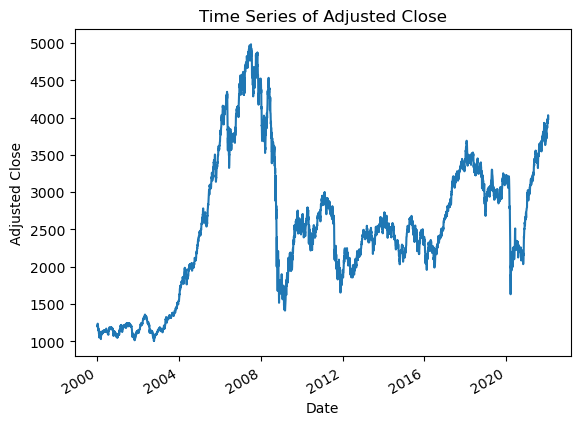

In [26]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('C:/Users/Nicolas/Documents/Uni/MA Banking and Finance/Pyhton for Fianance I_KU_W23/data/ATX.csv')

# Convert Date column into DatetimeIndex
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Replace missing values with the last previous available value
df.fillna(method='ffill', inplace=True)

# Plot the time series of the Adjusted Close
import matplotlib.pyplot as plt
df['Adj Close'].plot()
plt.title('Time Series of Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.show()


Read the file 'ATX.csv' that you can find in the folder Course Material / data into a pandas DataFrame. Create a new column containing the absolute value of the daily relative price range defined as the difference between the High and Low prices divided by the previous day's Adjusted Close. Create another column containing the absolute values of the daily returns. Make a scatter plot of the price range against the absolute values of the returns.

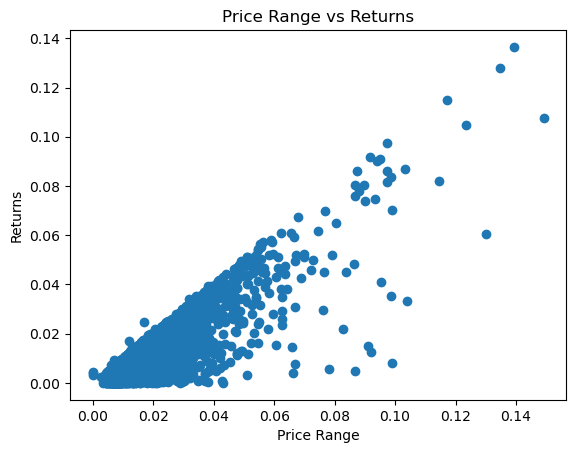

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('C:/Users/Nicolas/Documents/Uni/MA Banking and Finance/Pyhton for Fianance I_KU_W23/data/ATX.csv')

# Create a new column containing the absolute value of the daily relative price range
df['Price Range'] = abs((df['High'] - df['Low']) / df['Adj Close'].shift(1))

# Create another column containing the absolute values of the daily returns
df['Returns'] = abs(df['Adj Close'].pct_change())

# Make a scatter plot of the price range against the absolute values of the returns
plt.scatter(df['Price Range'], df['Returns'])
plt.xlabel('Price Range')
plt.ylabel('Returns')
plt.title('Price Range vs Returns')
plt.show()

Write a function that takes a list of integers and returns the smallest even element of that list. If there is no even number in the list, the function should return None. If the list contains any non-integers, the function should print "Non-integer detected!" and continue with the next element of the list.



In [34]:
def smallest_even_element(arr):
    smallest_even = None
    for num in arr:
        if isinstance(num, int):
            if num % 2 == 0:
                if smallest_even is None or num < smallest_even:
                    smallest_even = num
        else:
            print("Non-integer detected!")
    return smallest_even

arr1 = [3, 7, 2, 8, 5, 4]
result = smallest_even_element(arr1)
print(result)  # This should print 2, which is the smallest even number in the list.

arr2 = [3, 7, 5]
result = smallest_even_element(arr2)
print(result) 

arr3 = ['Hello']
result = smallest_even_element(arr3)
print(result)

2
None
Non-integer detected!
None


Read the files 'ATX.csv' and 'OMV.csv' that you can find in the folder Course Material / data into pandas DataFrames, turning the Date column into a DatetimeIndex. Estimate rolling market betas (where the ATX serves as the market index) for OMV by regressing OMV's daily returns on the daily returns of the ATX. Use a rolling window of 252 days. Plot the estimates of beta over time.

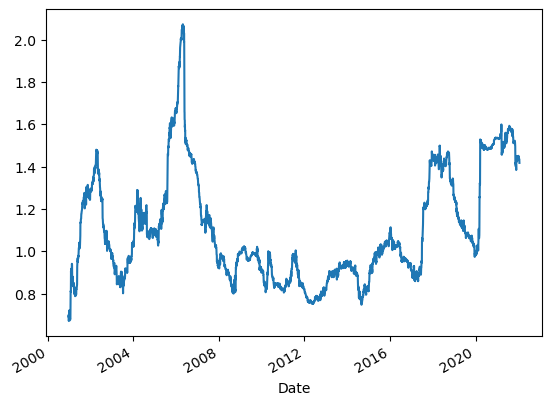

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the files into pandas DataFrames
atx_df = pd.read_csv('C:/Users/Nicolas/Documents/Uni/MA Banking and Finance/Pyhton for Fianance I_KU_W23/data/ATX.csv')
omv_df = pd.read_csv('C:/Users/Nicolas/Documents/Uni/MA Banking and Finance/Pyhton for Fianance I_KU_W23/data/OMV.csv')

# Convert Date column to DatetimeIndex
atx_df['Date'] = pd.to_datetime(atx_df['Date'])
atx_df.set_index('Date', inplace=True)

omv_df['Date'] = pd.to_datetime(omv_df['Date'])
omv_df.set_index('Date', inplace=True)

atx_df['daily_returns'] = atx_df['Adj Close'].pct_change().dropna()
omv_df['daily_returns'] = omv_df['Adj Close'].pct_change().dropna()


# Calculate rolling market betas
window = 252
rolling_cov = omv_df['daily_returns'].rolling(window).cov(atx_df['daily_returns'])
rolling_var = atx_df['daily_returns'].rolling(window).var()

rolling_beta = rolling_cov / rolling_var

# Plot the estimates of beta over time
rolling_beta.plot()
plt.show()